In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
import keras
from tensorflow.keras import Model
import numpy as np
from glob import glob
import zipfile
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from zipfile import ZipFile
file_name = "ds.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

FileNotFoundError: [Errno 2] No such file or directory: 'ds.zip'

In [19]:
train_path = (r'C:\ds\Split_smol\train')
test_path = (r'C:\ds\Split_smol\val')

In [20]:
(train,val),(train,val)=tf.keras.datasets.mnist.load_data()

In [21]:
train.shape

(10000, 28, 28)

In [22]:
val.shape

(10000,)

In [23]:
np.max(train)

255

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [25]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [26]:
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

In [27]:
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=9, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [28]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory(r'C:\ds\Split_smol\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 697 images belonging to 9 classes.


In [33]:
test_set = test_datagen.flow_from_directory(r'C:\ds\Split_smol\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 181 images belonging to 9 classes.


In [35]:
batch_size = 32
# Adjust the steps per epoch if needed
steps_per_epoch = len(training_set) // batch_size
validation_steps = len(test_set) // batch_size

In [36]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=8
)


Epoch 1/8
22/22 [==============================] - 55s 2s/step - loss: 1.9125 - accuracy: 0.3214 - val_loss: 1.3365 - val_accuracy: 0.5746
Epoch 2/8
22/22 [==============================] - 41s 2s/step - loss: 1.1718 - accuracy: 0.5667 - val_loss: 0.9363 - val_accuracy: 0.6630
Epoch 3/8
22/22 [==============================] - 41s 2s/step - loss: 0.9254 - accuracy: 0.6600 - val_loss: 0.7908 - val_accuracy: 0.6685
Epoch 4/8
22/22 [==============================] - 49s 2s/step - loss: 0.7264 - accuracy: 0.7245 - val_loss: 0.9603 - val_accuracy: 0.6022
Epoch 5/8
22/22 [==============================] - 42s 2s/step - loss: 0.5793 - accuracy: 0.7547 - val_loss: 0.7756 - val_accuracy: 0.7293
Epoch 6/8
22/22 [==============================] - 45s 2s/step - loss: 0.5264 - accuracy: 0.7963 - val_loss: 0.8970 - val_accuracy: 0.6906
Epoch 7/8
22/22 [==============================] - 42s 2s/step - loss: 0.5088 - accuracy: 0.8135 - val_loss: 0.7417 - val_accuracy: 0.7017
Epoch 8/8
22/22 [==========

In [41]:
model.save("skin_disease.h5")

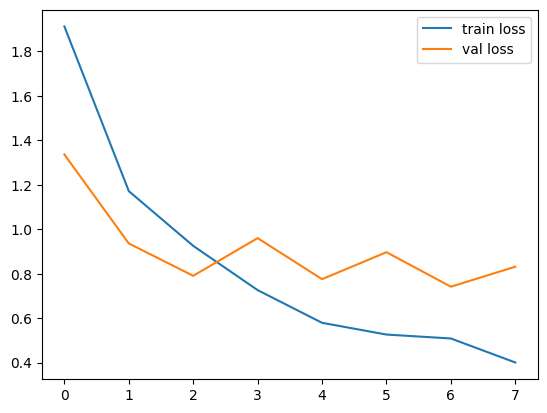

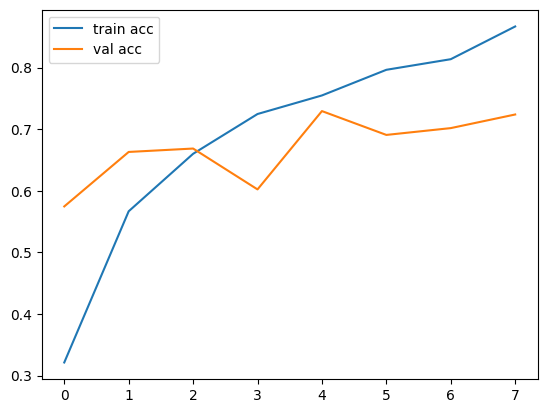

<Figure size 640x480 with 0 Axes>

In [42]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
   

In [43]:
classes = ["Actinic keratosis" , "Benign keratosis" , "Dermatofibroma" , "Melanocytic nevus" , "Melanoma" , "Squamous cell carcinoma" , "Squamous cell carcinoma" , "Vascular lesion"]

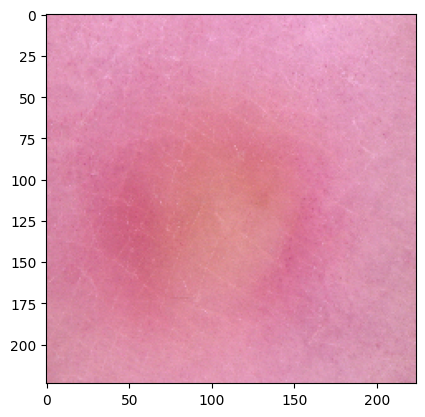

In [44]:
from tensorflow.keras.preprocessing import image
im = image.load_img(r'C:\ds\Split_smol\val\Dermatofibroma\ISIC_0024994.jpg', target_size=(224, 224))
plt.imshow(im)

1/1 [==============================] - 1s 1s/step
[[3.0769541e-05 5.5078112e-06 2.1870901e-06 9.9967039e-01 1.6048001e-05
  1.5139182e-05 1.6833030e-04 1.3638193e-05 7.8112236e-05]]
1/1 [==============================] - 0s 88ms/step
Melanocytic nevus


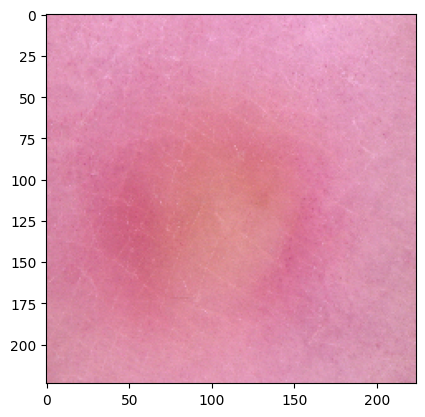

In [45]:
x=image.img_to_array(im)
x=x/255
plt.imshow(im)
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
print(model.predict(x))
print(classes[np.argmax(model.predict(x))])


In [46]:
def predict_image(img):
    plt.figure(figsize=(20,8))
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])

1/1 [==============================] - 0s 68ms/step
Squamous cell carcinoma


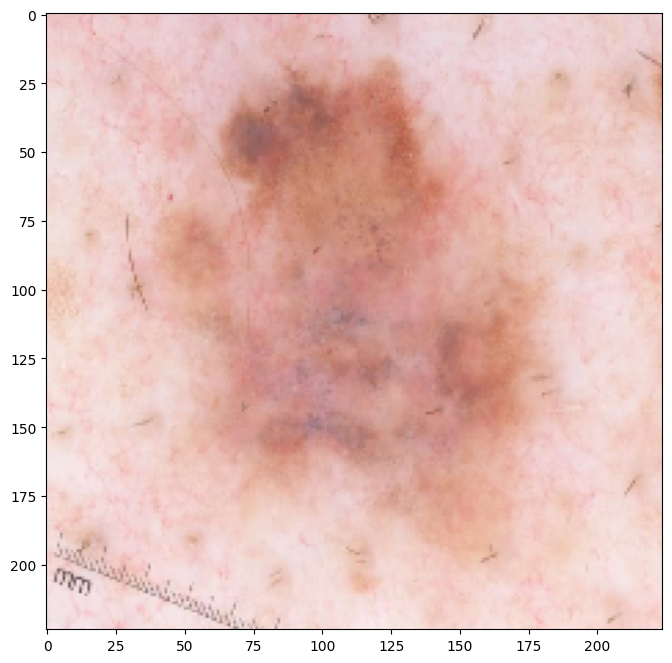

In [47]:
from tensorflow.keras.preprocessing import image
im=image.load_img(r'C:\ds\Split_smol\val\Melanoma\ISIC_0000554.jpg',target_size=(224,224))
predict_image(im)

1/1 [==============================] - 0s 70ms/step
Squamous cell carcinoma


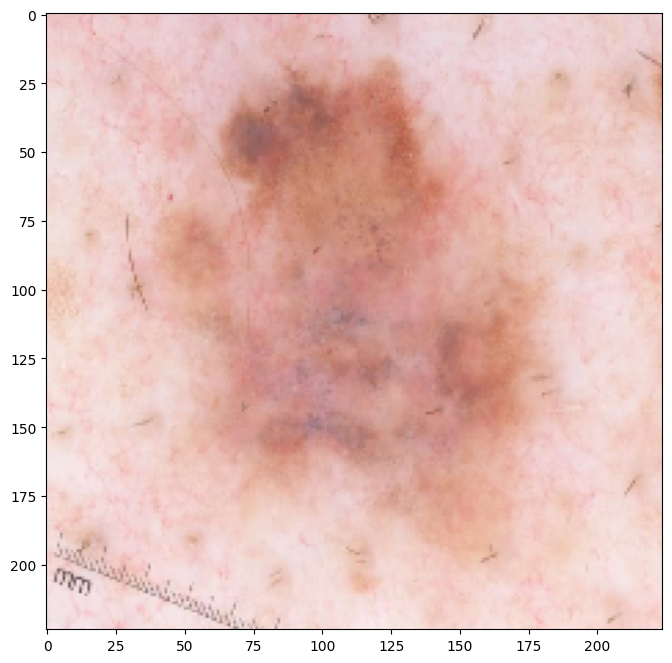

In [48]:
im4=image.load_img(r'C:\ds\Split_smol\val\Melanoma\ISIC_0000554.jpg',target_size=(224,224))
predict_image(im4)